In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
import itertools

In [2]:
df=pd.read_csv('product h.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [3]:
df.head(15)

,Product Name,Product Category,Month,Year,Sales,Market Size,Marketing Expense,Month No.
Month-Year,,,,,,,,
2019-01-01,Product H,Anti Biotic Upper Respiratory,January,2019,62686,142038,447509,1
2019-02-01,Product H,Anti Biotic Upper Respiratory,February,2019,74426,168635,531319,2
2019-03-01,Product H,Anti Biotic Upper Respiratory,March,2019,91347,206976,652116,3
2019-04-01,Product H,Anti Biotic Upper Respiratory,April,2019,60600,137309,432617,4
2019-05-01,Product H,Anti Biotic Upper Respiratory,May,2019,37374,84683,266809,5
2019-06-01,Product H,Anti Biotic Upper Respiratory,June,2019,30737,69648,219428,6
2019-07-01,Product H,Anti Biotic Upper Respiratory,July,2019,29683,67255,211904,7
2019-08-01,Product H,Anti Biotic Upper Respiratory,August,2019,34788,78824,248348,8
2019-09-01,Product H,Anti Biotic Upper Respiratory,September,2019,43408,98356,309885,9


In [4]:
sales_h= df.drop(['Product Name','Product Category','Month','Year','Month No.'],axis=1)

In [5]:
sales_h.shape

(60, 3)

In [6]:
sales_h.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-12-01
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Sales              60 non-null     int64
 1   Market Size        60 non-null     int64
 2   Marketing Expense  60 non-null     int64
dtypes: int64(3)
memory usage: 1.9 KB


In [7]:
print('Total Sales:', sales_h['Sales'].sum())
print('Total Market Size:',sales_h['Market Size'].sum())
print('Total Marketing Expense:', sales_h['Marketing Expense'].sum())

Total Sales: 4057933
Total Market Size: 7143631
Total Marketing Expense: 12841800


Text(0.5, 1.0, 'Product H')

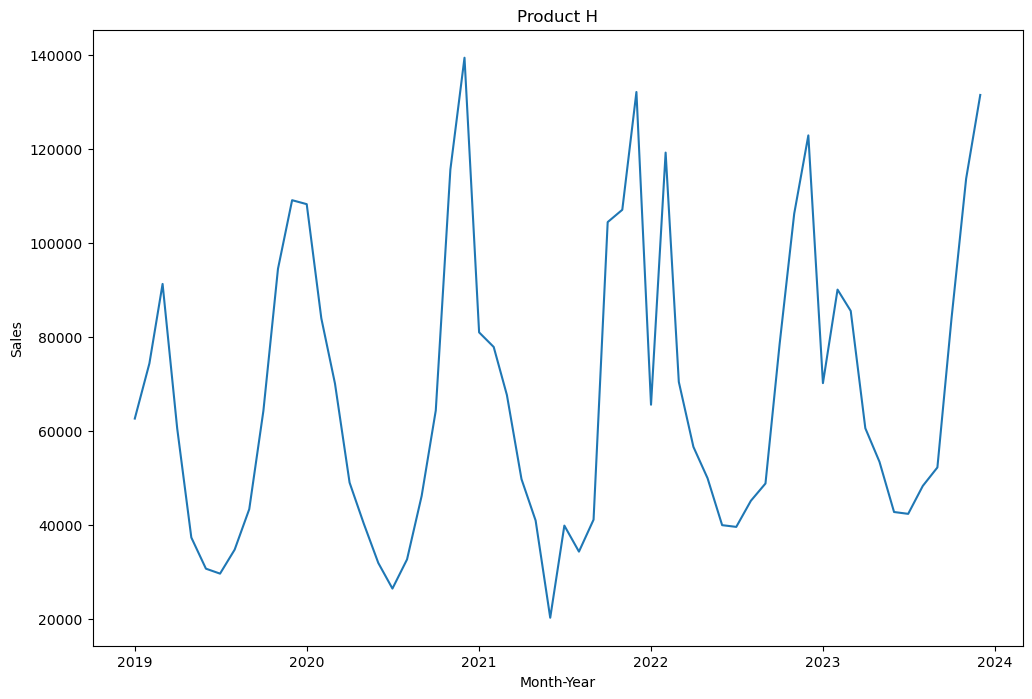

In [8]:
plt.figure(figsize=(12,8))
sns.lineplot(sales_h['Sales'])
plt.title('Product H')

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [11]:
adf_test(sales_h['Sales'])

ADF Statistics: -1.0256008967536312
p- value: 0.7438128320877682
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [12]:
sales_h_diff= sales_h['Sales'].diff().dropna()

Text(0.5, 1.0, 'Product H - First Difference')

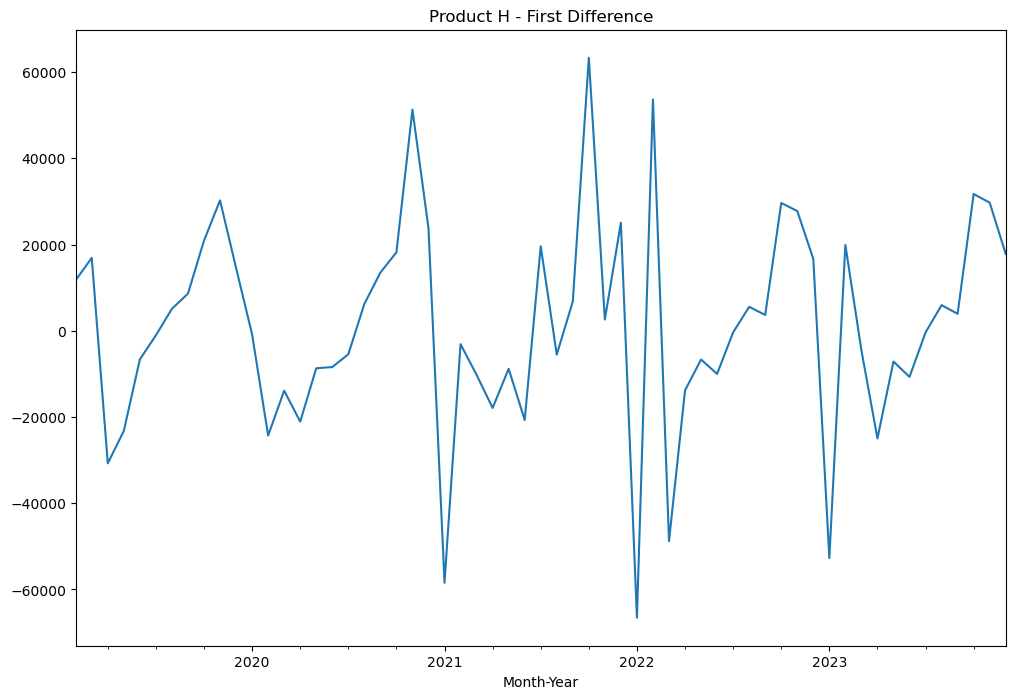

In [13]:
sales_h_diff.plot(figsize=(12,8))
plt.title('Product H - First Difference')

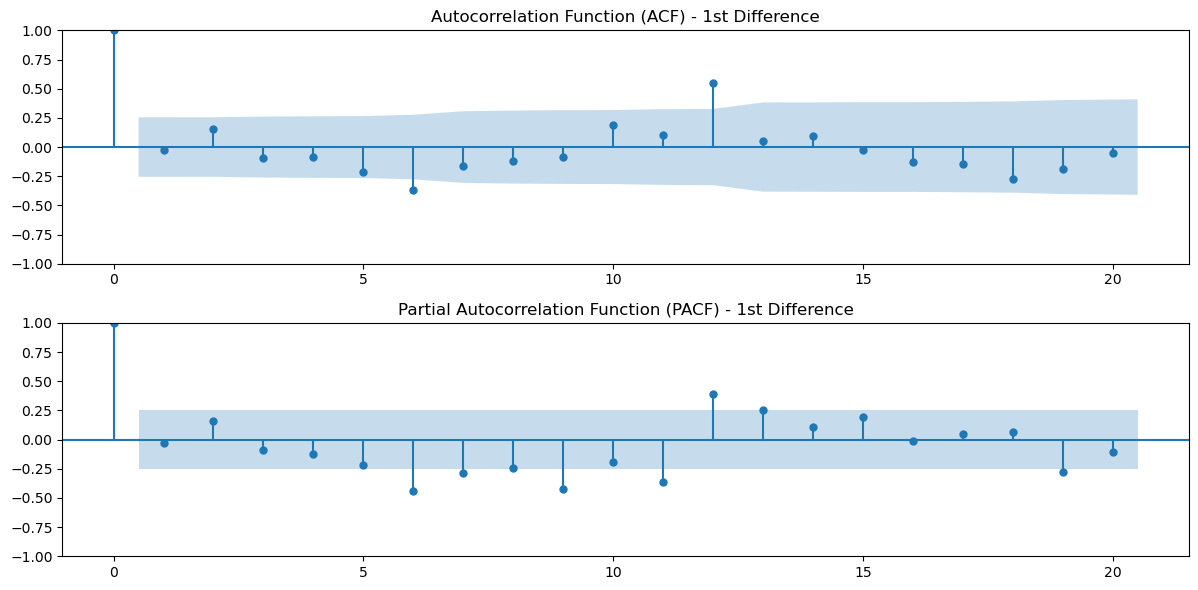

In [14]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_h_diff, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - 1st Difference')

plt.subplot(212)
plot_pacf(sales_h_diff, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - 1st Difference')

plt.tight_layout()
plt.show()

In [15]:
adf_test(sales_h_diff)

ADF Statistics: -8.916466740826941
p- value: 1.0693903940841229e-14
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [16]:
train= sales_h[:48]
test=sales_h[48:]

In [17]:
len(train)

48

In [18]:
#Finding the best value for ARIMA

#import itertools
#p=d=q=range(0,5)
#pdq = list(itertools.product(p,d,q))

#for param in pdq:
#    try:
#        model_arima = ARIMA(train,order=param)
#        model_arima_fit = model_arima.fit()
#       print(param,model_arima_fit.aic)
#    except:
#        continue
    
# The Akaike information criterion (AIC) is an estimator of in-sample prediction error and thereby relative quality of
# statistical models for a given set of data

# It's like the mean squared error in Regression - The smaller the number, the better

In [19]:
#therefore, the combination p=(0,1,2,3,4,5) d=1 q=(0,1,2,3) must be tested with accuracy metrics and aic

In [20]:
#param = [(0,1,0),(0,1,1),(0,1,2),(0,1,3),(1,1,0),(1,1,1),(1,1,2),(1,1,3),(2,1,0), (2,1,1), (2,1,2),(2,1,3),(3,1,0),(3,1,1),(3,1,2),(3,1,3),(4,1,0),(4,1,1),(4,1,2),(4,1,3),(5,1,0),(5,1,1),(5,1,2),(5,1,3)]

#for p in param:  # Changed 'x' to 'p'
#    model = ARIMA(train, order=p).fit()
#    pred = model.forecast(steps=len(test))
#    mae = mean_absolute_error(test, pred)
#    mape = np.mean(np.abs((test - pred) / test)) * 100
#    mse=mean_squared_error(test, pred)
#    rmse = np.sqrt(mean_squared_error(test, pred))
#    print(p)
#    print(f'MAE: {mae}')
#    print(f'MSE: {mse}')
#    print(f'RMSE: {rmse}')
#    print('A.I.C:', model.aic)

In [21]:
order=[]
for p in range(6):
    # Loop over MA order
    for q in range(3):
        # Fit model        
#       model= ARIMA(sales_b, order=(p,1,q))
        model_t = ARIMA(train['Sales'], order=(p,1,q), exog=train[['Market Size','Marketing Expense']])
        model_test=model_t.fit() 
        pred=model_test.predict(start=len(train), end=(len(sales_h)-1), exog=test[['Market Size','Marketing Expense']])
        mae = mean_absolute_error(test['Sales'], pred)
        mape = np.mean(np.abs((test['Sales'] - pred) / test)) * 100
        mse=mean_squared_error(test['Sales'], pred)
        rmse = np.sqrt(mean_squared_error(test['Sales'], pred))
        # Add order and scores to list        
        order.append((p, q, model_test.aic, model_test.bic,mae, mse, rmse))
#Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order, columns=['p','q', 'aic', 'bic', 'mae','mse', 'rmse'])

In [22]:
# Sort by AIC
print(order_df.sort_values('aic'))

    p  q          aic          bic           mae           mse          rmse
1   0  1  1069.074644  1076.475234  14506.732074  4.883214e+08  22097.995935
4   1  1  1070.623306  1079.874044  12786.593334  4.602322e+08  21453.022210
7   2  1  1071.128995  1082.229881  20002.816542  7.021927e+08  26498.918292
2   0  2  1071.632851  1080.883589  12465.208239  4.621106e+08  21496.758137
5   1  2  1073.086100  1084.186985  13629.332168  4.784482e+08  21873.458529
10  3  1  1073.108600  1086.059633  19324.276427  6.747421e+08  25975.798057
8   2  2  1074.130533  1087.081566  18521.241248  6.421755e+08  25341.181565
11  3  2  1074.882262  1089.683443  19120.417306  6.645844e+08  25779.535418
13  4  1  1075.012073  1089.813253  21688.690951  7.681428e+08  27715.389255
14  4  2  1076.546272  1093.197601  23100.646646  8.504876e+08  29163.120484
3   1  0  1077.006861  1084.407452  33773.567734  1.258664e+09  35477.660461
16  5  1  1077.182060  1093.833389  21795.276465  7.728093e+08  27799.448062

In [23]:
m_arima= ARIMA(train['Sales'], order=(0,1,1), exog=train[['Market Size','Marketing Expense']])
model_arima=m_arima.fit()
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -530.537
Date:                Thu, 09 May 2024   AIC                           1069.075
Time:                        18:22:22   BIC                           1076.475
Sample:                    01-01-2019   HQIC                          1071.860
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Market Size           0.5731      0.100      5.754      0.000       0.378       0.768
Marketing Expense    -0.0735      0.033     -2.247      0.025      -0.138      -0.009
ma.L1                -0.

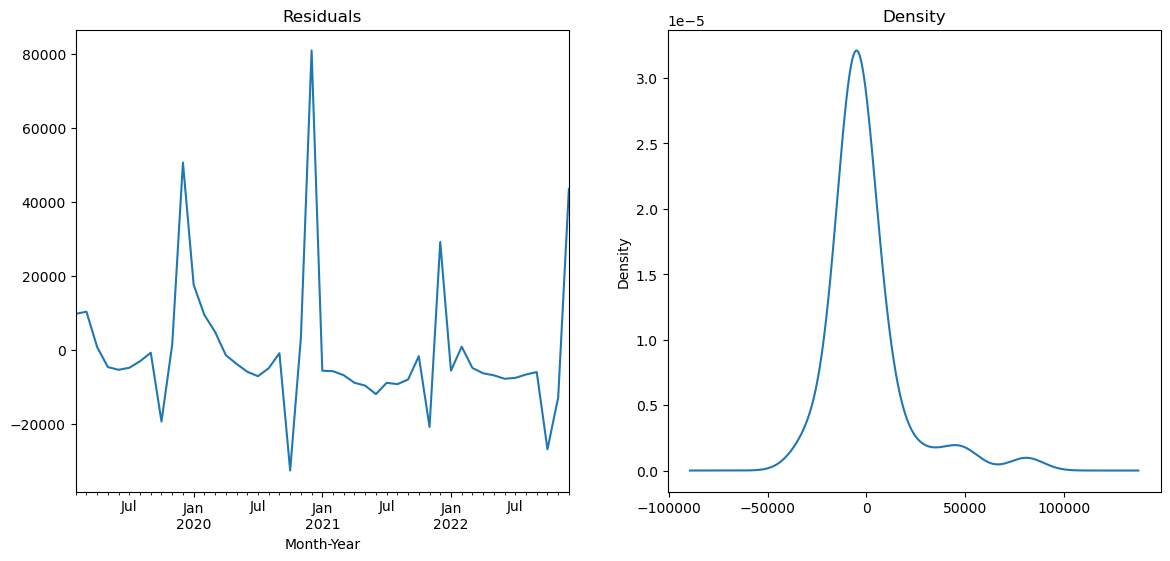

In [24]:
residuals= model_arima.resid[1:]
fig,ax=plt.subplots(1,2, figsize=(14, 6))
residuals.plot(title='Residuals',ax=ax[0])
residuals.plot(title='Density',kind='kde',ax=ax[1])
plt.show()

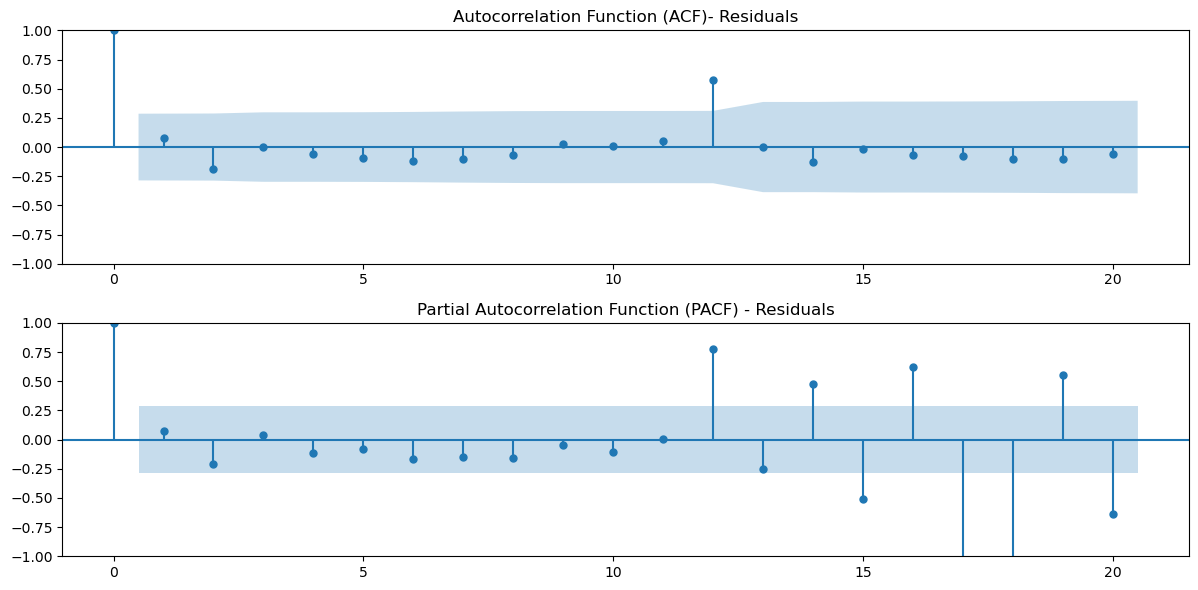

In [25]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)- Residuals')

plt.subplot(212)
plot_pacf(residuals, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Residuals')

plt.tight_layout()
plt.show()

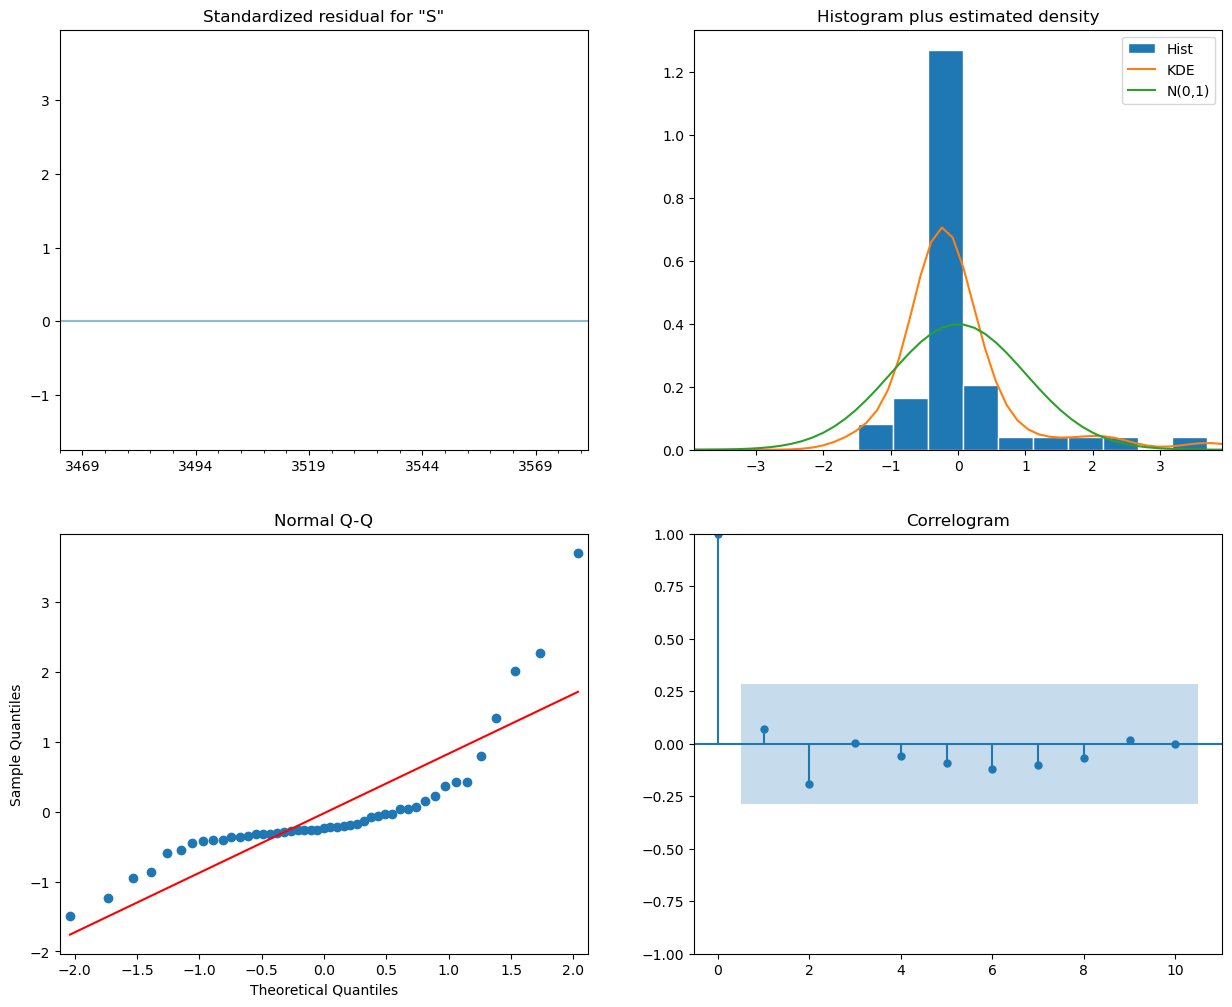

In [26]:
# Create the 4 diagostics plots
model_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [27]:
#pred_in_sample = model_arima.get_prediction(start=len(train), end=(len(sales_b)-1))
#sales_b['Forecast_ARIMA_p']=[None]*len(train) + list(pred)

In [28]:
#plt.figure(figsize=(12, 8))
#sns.lineplot(sales_b[['Sales','Forecast_ARIMA_p']])
#plt.title('Product B')
#plt.show()

In [29]:
pred=model_arima.predict(start=len(train), end=(len(sales_h)-1), exog=test[['Market Size','Marketing Expense']], dynamic = True)
sales_h['Forecast_ARIMAX']=[None]*len(train) + list(pred)
#sales_b.plot()

In [30]:
#pred=model_arima.forecast(steps= len(test))
#sales_b['Forecast_ARIMA']=[None]*len(train) + list(pred)
#sales_b.plot()

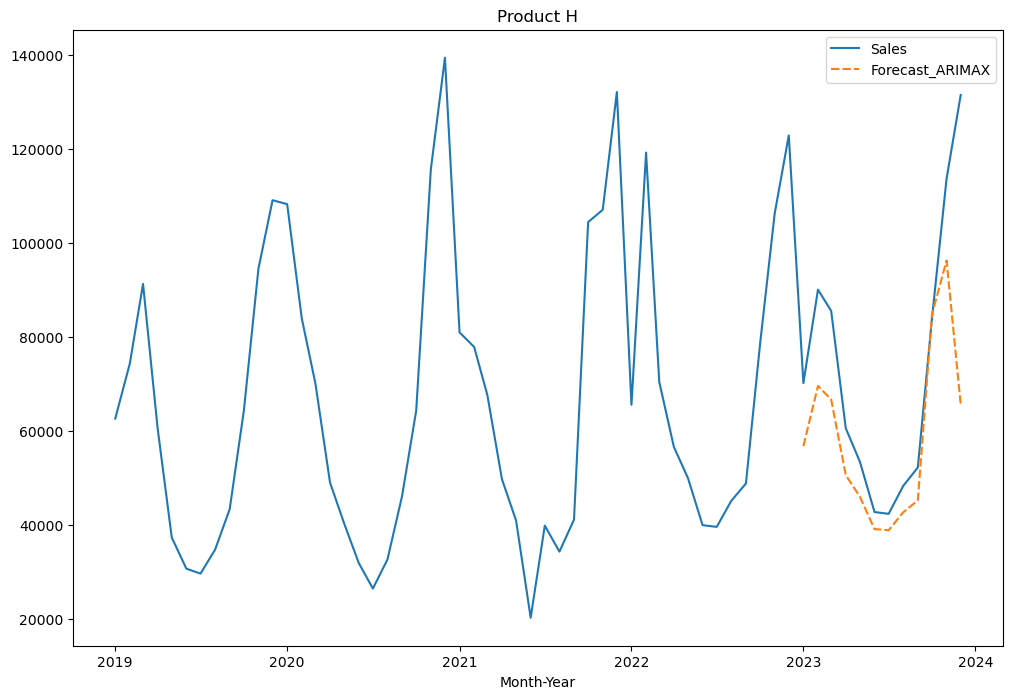

In [31]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_h[['Sales','Forecast_ARIMAX']])
plt.title('Product H')
plt.show()

In [32]:
mae_arimax= mean_absolute_error(test['Sales'],pred)
mse_arimax=mean_squared_error(test['Sales'], pred)
mape_arimax= mean_absolute_percentage_error(test['Sales'],pred)
rmse_arimax= np.sqrt(mean_squared_error(test['Sales'],pred))

print(f'MAE - ARIMAX: {mae_arimax}')
print(f'MAPE - ARIMAX: {mape_arimax}')
print(f'MSE - ARIMAX: {mse_arimax}')
print(f'RMSE - ARIMAX: {rmse_arimax}')

MAE - ARIMAX: 14506.732074219637
MAPE - ARIMAX: 0.16866013780169054
MSE - ARIMAX: 488321424.35865325
RMSE - ARIMAX: 22097.99593534792


# SARIMA

In [33]:
import statsmodels.api as sm

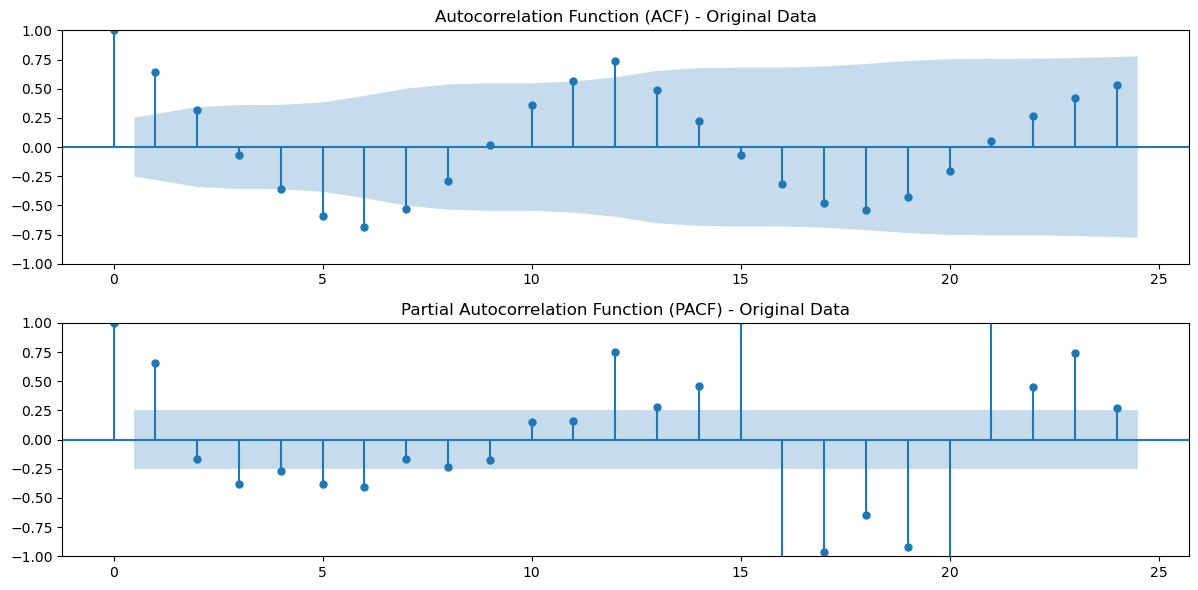

In [34]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_h['Sales'], lags=24, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Original Data')

plt.subplot(212)
plot_pacf(sales_h['Sales'], lags=24, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Original Data')

plt.tight_layout()
plt.show()

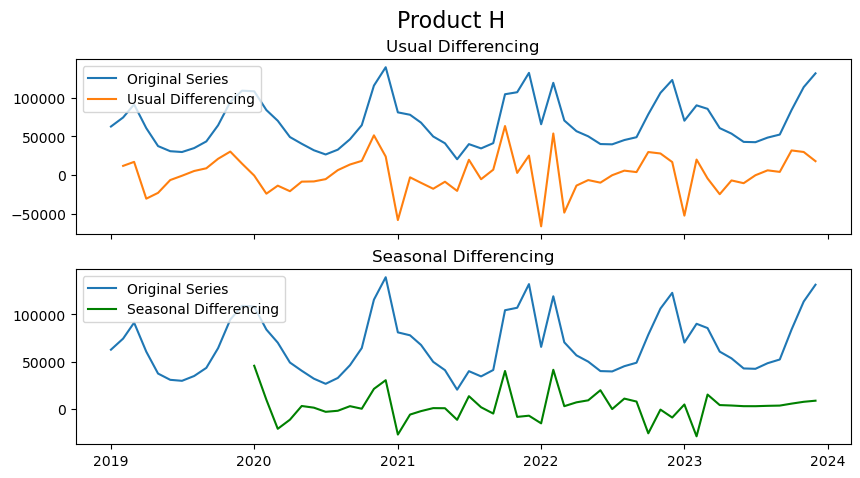

In [35]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(sales_h['Sales'], label='Original Series')
axes[0].plot(sales_h['Sales'].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(sales_h['Sales'], label='Original Series')
axes[1].plot(sales_h['Sales'].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Product H', fontsize=16)
plt.show()

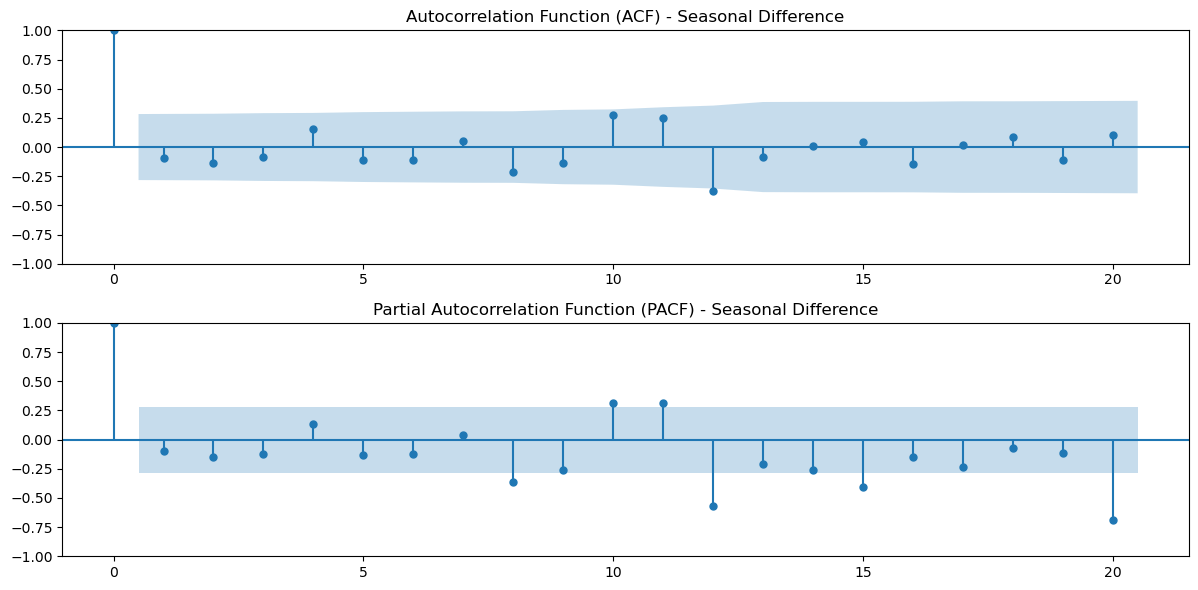

In [36]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_h['Sales'].diff(12).dropna(), lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Seasonal Difference')

plt.subplot(212)
plot_pacf(sales_h['Sales'].diff(12).dropna(), lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Seasonal Difference')

plt.tight_layout()
plt.show()

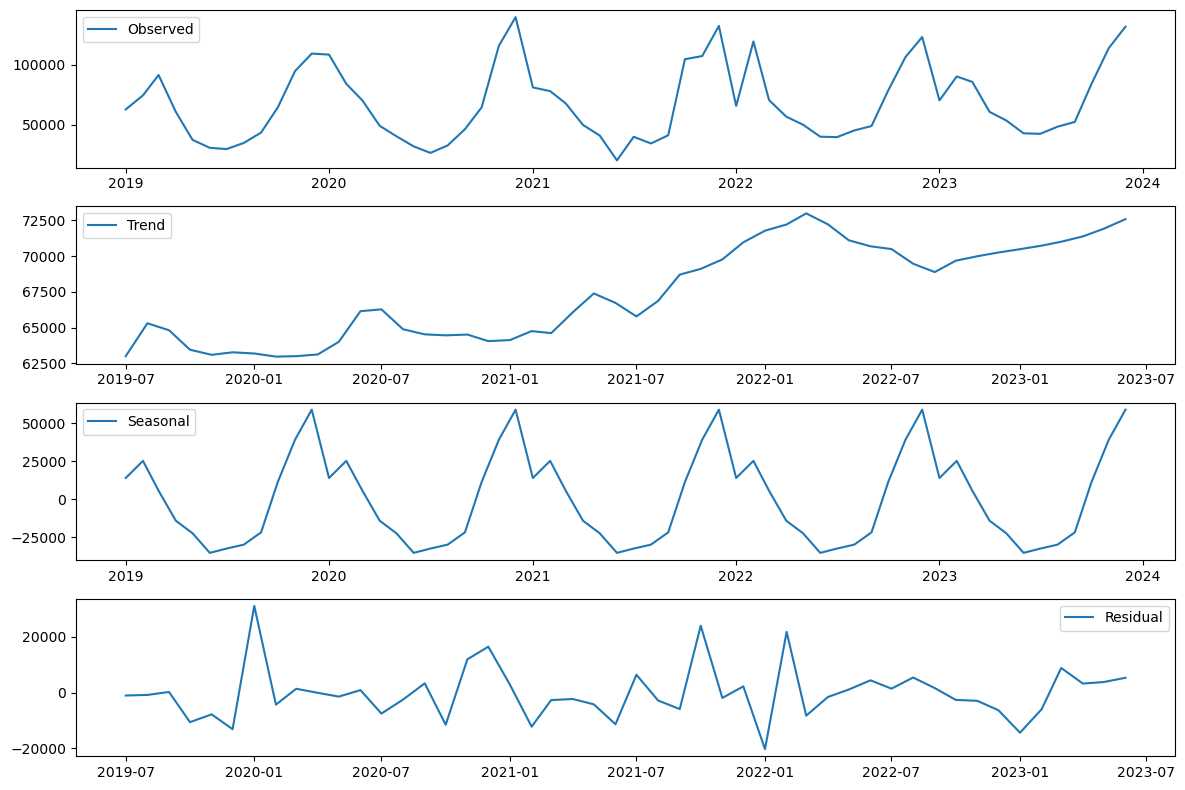

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(sales_h['Sales'], model='additive', period=12)

# Plot the decomposition
#fig = decomposition.plot(figsize=(12,8))
#plt.show()
# Create a new figure with the specified size
plt.figure(figsize=(12, 8))

# Plot each component separately
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [38]:
order_SARIMAX=[]
# Loop over P order
for P in range(5):
    # Loop over Q order
    for Q in range(2):
        # Fit model
        model_s = sm.tsa.statespace.SARIMAX(train['Sales'], order=(0, 1, 1), seasonal_order=(P, 1, Q, 12),exog=train[['Market Size','Marketing Expense']])
        model_test_s = model_s.fit() 
        pred = model_test_s.predict(start=48, end=59, dynamic=True, exog=test[['Market Size','Marketing Expense']])
        mae = mean_absolute_error(test['Sales'], pred)
        mse = mean_squared_error(test['Sales'], pred)
        # Add order and scores to list        
        order_SARIMAX.append((P, Q, model_test_s.aic, model_test_s.bic, mae, mse))

# Make DataFrame of model order and scores
order_SARIMAX_df = pd.DataFrame(order_SARIMAX, columns=['P', 'Q', 'aic', 'bic', 'mae', 'mse'])


In [39]:
# Sort by AIC
print(order_SARIMAX_df.sort_values('aic'))

   P  Q         aic         bic           mae           mse
4  2  0  781.291282  790.623370  12629.565660  2.117889e+08
1  0  1  782.169286  789.946026  19819.848311  4.258287e+08
6  3  0  783.133843  794.021279  13476.995931  2.459063e+08
5  2  1  783.173179  794.060615  13148.835741  2.327364e+08
3  1  1  783.752451  793.084539  18161.296180  3.631521e+08
0  0  0  784.209167  790.430560  18791.652573  3.897724e+08
2  1  0  784.240985  792.017725  22166.194720  5.341493e+08
8  4  0  785.092560  797.535345  13644.852839  2.551253e+08
7  3  1  785.098849  797.541633  13602.715947  2.536198e+08
9  4  1  787.093648  801.091780  13628.587634  2.548736e+08


In [40]:
sarima=sm.tsa.statespace.SARIMAX(train['Sales'],order=(0, 1, 1),seasonal_order=(2,1,0,12),exog=train[['Market Size','Marketing Expense']])
sarima_model=sarima.fit()
print(sarima_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -384.646
Date:                             Thu, 09 May 2024   AIC                            781.291
Time:                                     18:26:15   BIC                            790.623
Sample:                                 01-01-2019   HQIC                           784.513
                                      - 12-01-2022                                         
Covariance Type:                               opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Market Size           0.5622      0.147      3.815      0.000       0.273       0.851
Market

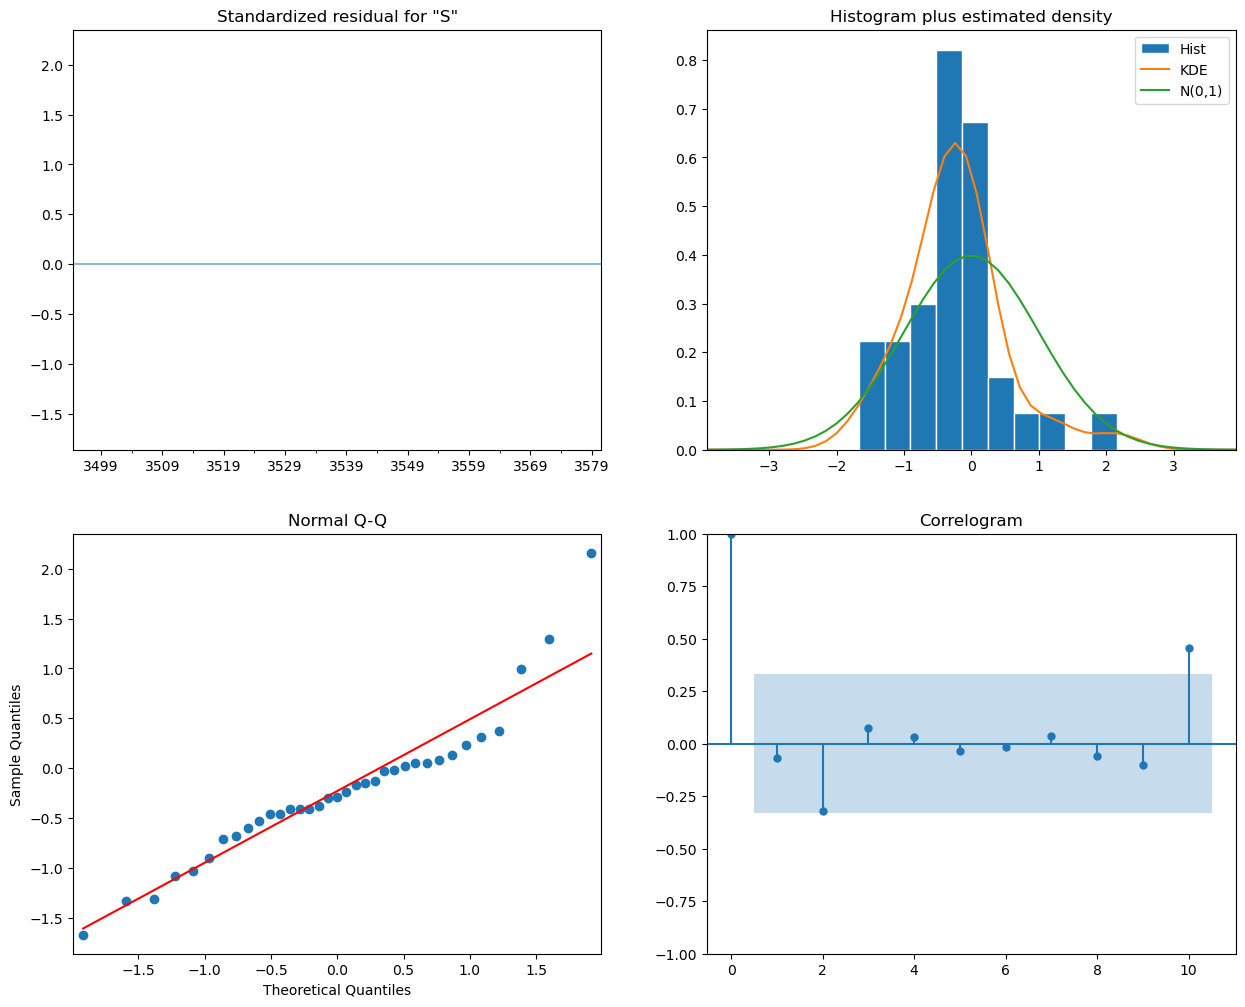

In [41]:
sarima_model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [42]:
forecast_test_sarima=sarima_model.predict(start=48, end=59, dynamic=True, exog=test[['Market Size','Marketing Expense']])

In [43]:
sales_h['Forecast_SARIMAX']=[None]*len(train)+ list(forecast_test_sarima)
#sales_b[['Sales','Forecast_SARIMA']].plot(figsize=(12,8))

Text(0.5, 1.0, 'Product H')

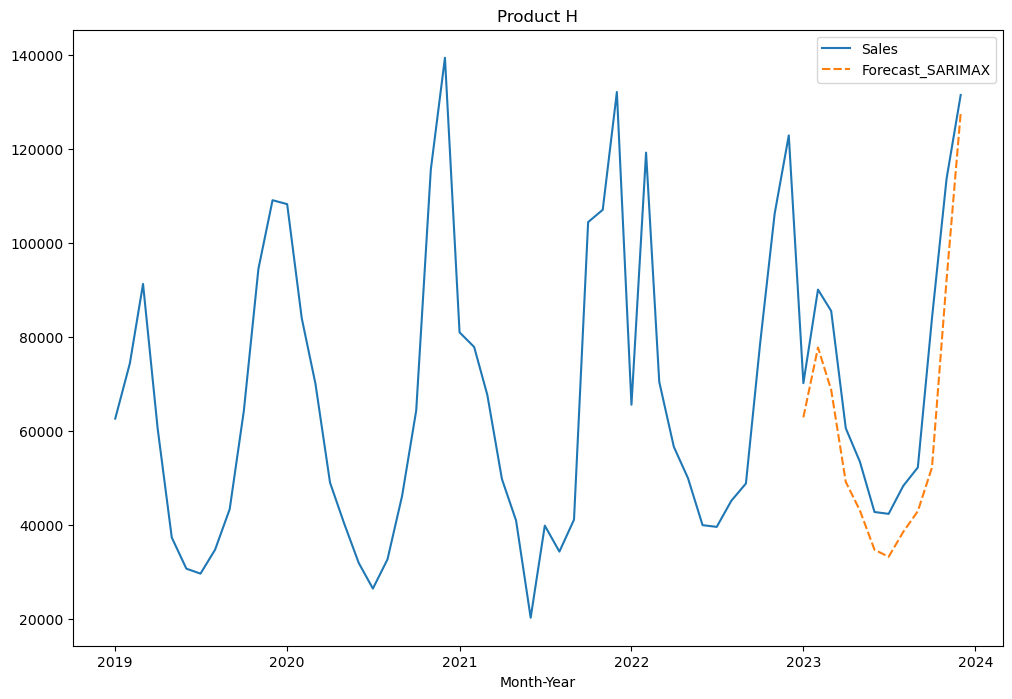

In [44]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_h[['Sales','Forecast_SARIMAX']])
plt.title('Product H')

In [45]:
mae_sarimax= mean_absolute_error(test['Sales'],forecast_test_sarima)
mape_sarimax= mean_absolute_percentage_error(test['Sales'],forecast_test_sarima)
mse_sarimax=mean_squared_error(test['Sales'], forecast_test_sarima)
rmse_sarimax= np.sqrt(mean_squared_error(test['Sales'],forecast_test_sarima))

print(f'MAE - SARIMAX: {round(mae_sarimax,3)}')
print(f'MAPE - SARIMAX: {round(mape_sarimax,3)}')
print(f'MSE - SARIMAX: {round(mse_sarimax,3)}')
print(f'RMSE - SARIMAX: {round(rmse_sarimax,3)}')

MAE - SARIMAX: 12629.566
MAPE - SARIMAX: 0.183
MSE - SARIMAX: 211788876.195
RMSE - SARIMAX: 14552.968


# AUTO-ARIMA

In [46]:
import pmdarima as pm

In [47]:
auto_arima= pm.auto_arima(train['Sales'], start_p=0, d=1, start_q=0, max_p=6,max_q=2,
                          start_P=0, D=1, start_Q=0, max_P=6 ,max_Q=2 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12, exogenous=train[['Market Size','Marketing Expense']])
auto_arima

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=806.435, Time=0.06 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=808.104, Time=0.11 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=808.232, Time=0.23 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=808.308, Time=0.06 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.22 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=809.843, Time=0.40 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=808.650, Time=0.18 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=809.739, Time=0.41 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=811.447, Time=0.72 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=809.569, Time=1.16 sec
 ARIMA(0,1,0)(3,1,1)[12]             : AIC=811.431, Time=3.10 sec
 ARIMA(0,1,0)(3,1,2)[12]             : AIC=813.315, Time=2.90 sec
 ARIMA(0,1,0)(4,1,0)[12]             : AIC=811.569, Time=2.09 sec
 ARIMA(0,1,0)(4,1,1)[12]             : AIC=813.431, Time=3.06 sec
 ARIMA(0,1,0)(5,1,0)[12]             : AIC=813.569, Time=4.66 sec
 ARIMA(0,1,1)(

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [48]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 12)   Log Likelihood                -399.420
Date:                             Thu, 09 May 2024   AIC                            804.840
Time:                                     18:28:45   BIC                            809.506
Sample:                                 01-01-2019   HQIC                           806.451
                                      - 12-01-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5381      0.156      3.457      0.001       0.233       0.843
ma.L1         -0.8749      0.135     -6.480      0.000      -1.140      -0.610
sigma2      4.779e+08   3.59e-11   1.33e+19      0.000    4.78e+08    4.78e+08
===================================================================================
Ljung-Box (L1) (Q):                   1.96   Jarque-Bera (JB):                 1.17
Prob(Q):                              0.16   Prob(JB):                         0.56
Heteroskedasticity (H):               0.67   Skew:                             0.16
Prob(H) (two-sided):                  0.51   Kurtosis:                         3.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.02e+35. Standard errors may be unstable.
"""

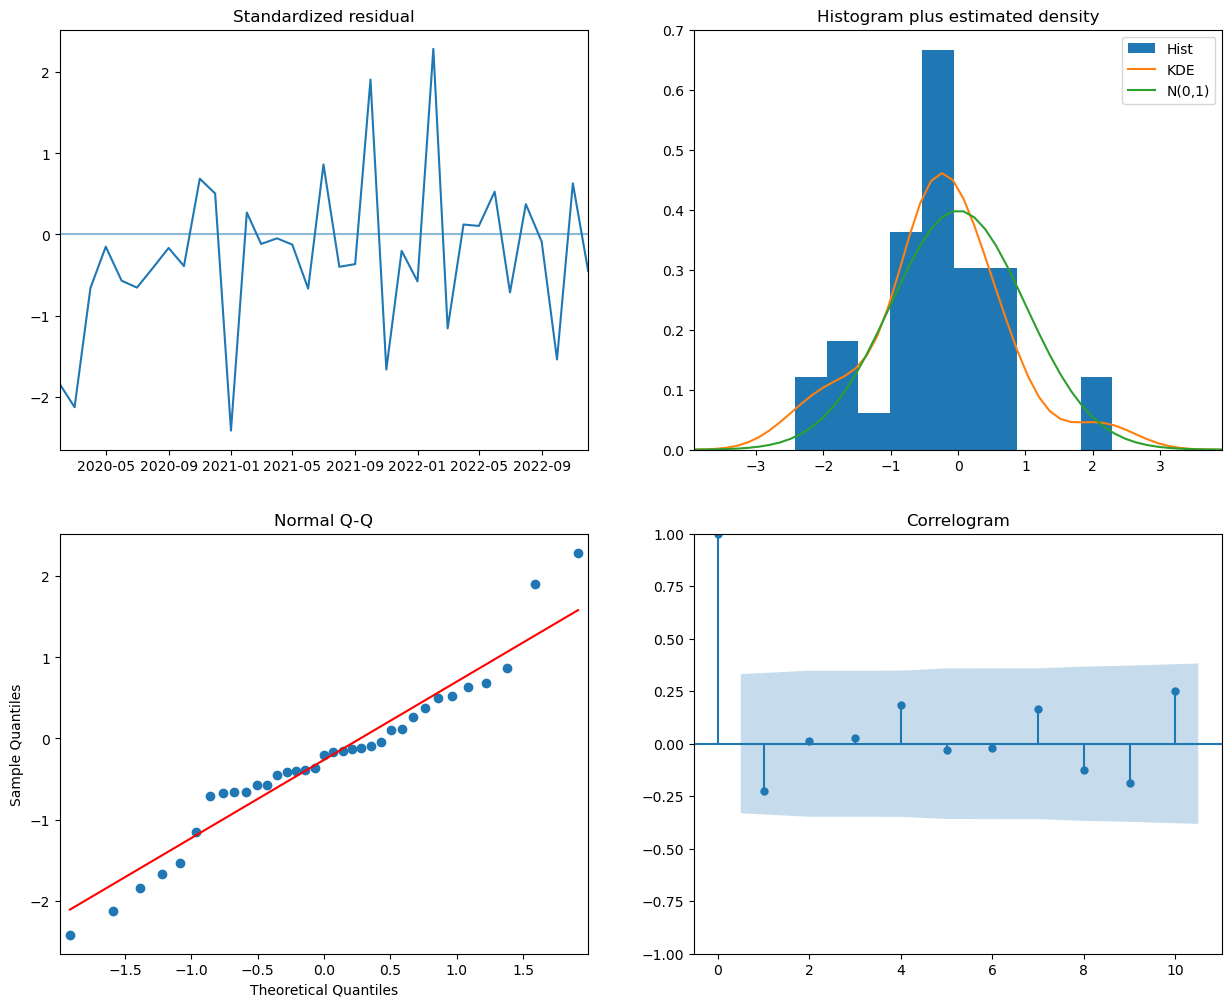

In [49]:
auto_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [50]:
forecast_test_auto= auto_arima.predict(n_periods=len(test), exogenous=test[['Market Size','Marketing Expense']])
sales_h['Forecast_AUTO ARIMAX']=[None]*len(train)+ list(forecast_test_auto)
#sales_b[['Sales','Forecast_AUTO ARIMA']].plot()

Text(0.5, 1.0, 'Product H')

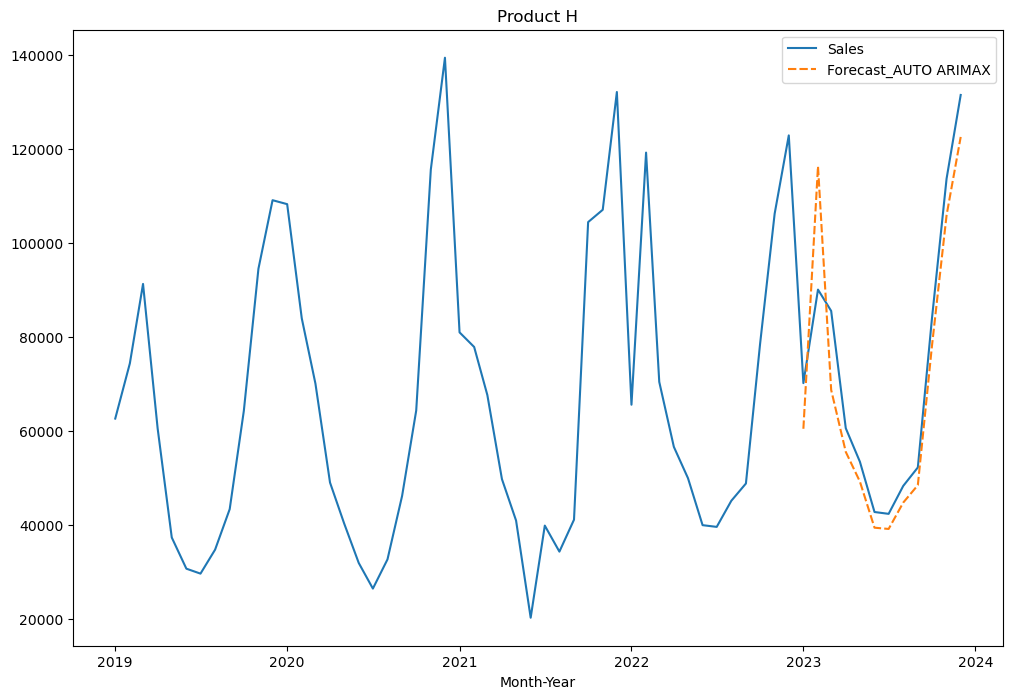

In [51]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_h[['Sales','Forecast_AUTO ARIMAX']])
plt.title('Product H')

In [52]:
mae_auto_arimax= mean_absolute_error(test['Sales'],forecast_test_auto)
mape_auto_arimax= mean_absolute_percentage_error(test['Sales'],forecast_test_auto)
mse_auto_arimax=mean_squared_error(test['Sales'],forecast_test_auto)
rmse_auto_arimax= np.sqrt(mean_squared_error(test['Sales'],forecast_test_auto))

print(f'MAE - AUTO ARIMAX: {mae_auto_arimax}')
print(f'MAPE - AUTO ARIMAX: {mape_auto_arimax}')
print(f'MSE - AUTO ARIMAX: {mse_auto_arimax}')
print(f'RMSE - AUTO ARIMAX: {rmse_auto_arimax}')

MAE - AUTO ARIMAX: 8206.388408195056
MAPE - AUTO ARIMAX: 0.10777257349710491
MSE - AUTO ARIMAX: 111059281.00671504
RMSE - AUTO ARIMAX: 10538.466729402102


In [53]:
sales_h.tail(12)

,Sales,Market Size,Marketing Expense,Forecast_ARIMAX,Forecast_SARIMAX,Forecast_AUTO ARIMAX
Month-Year,,,,,,
2023-01-01,70232,113254,267739,56825.595546,62947.248563,60517.647890
2023-02-01,90139,145361,343629,69646.501224,77807.858813,116399.859488
2023-03-01,85600,138040,326326,66722.994435,68792.175133,68782.385283
2023-04-01,60633,97775,231146,50644.986458,49210.358619,55597.073908
2023-05-01,53500,86276,203954,46054.131267,43120.394422,49275.361441
2023-06-01,42800,69017,163163,39162.051109,34770.629446,39461.157911
2023-07-01,42408,68386,161668,38910.341081,33267.352009,39194.133510
2023-08-01,48352,77974,184328,42739.206022,38558.392247,44803.929583
2023-09-01,52288,84321,199333,45273.467844,42975.267257,48511.876821


In [54]:
sales_h.mean()

Sales                    67632.216667
Market Size             119060.516667
Marketing Expense       214030.000000
Forecast_ARIMAX          58570.911436
Forecast_SARIMAX         60310.767673
Forecast_AUTO ARIMAX     69110.754840
dtype: float64

In [55]:
data = {
    'model': ['ARIMAX', 'AUTO ARIMAX', 'SEASONAL ARIMAX'],
    'MAE': [mae_arimax, mae_auto_arimax, mae_sarimax],  
    'MAPE': [mape_arimax, mape_auto_arimax, mape_sarimax],  
    'MSE': [mse_arimax, mse_auto_arimax, mse_sarimax],  
    'RMSE': [rmse_arimax, rmse_auto_arimax, rmse_sarimax]  
}

model_results = pd.DataFrame(data)
model_results.set_index('model', inplace=True)
model_results

,MAE,MAPE,MSE,RMSE
model,,,,
ARIMAX,14506.732074,0.168660,4.883214e+08,22097.995935
AUTO ARIMAX,8206.388408,0.107773,1.110593e+08,10538.466729
SEASONAL ARIMAX,12629.565660,0.183241,2.117889e+08,14552.967951


# TESTING

In [19]:
auto_arima_1= pm.auto_arima(train['Sales'], start_p=0, start_q=0, max_p=6,max_q=2,
                          start_P=0, start_Q=0, max_P=2 ,max_Q=2 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12, exogenous=train[['Market Size','Marketing Expense']])
auto_arima_1

 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=806.434, Time=0.03 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=808.338, Time=0.07 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=808.964, Time=0.24 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=808.360, Time=0.08 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=809.742, Time=0.23 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=809.683, Time=0.68 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=809.021, Time=0.32 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=809.703, Time=0.67 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=811.681, Time=1.17 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=806.523, Time=0.04 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=808.506, Time=0.19 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=809.322, Time=0.39 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=808.510, Time=0.15 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.96 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=1.48 sec
 ARIMA(0,0,1)(2,1,

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True)

In [20]:
auto_arima_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   48
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -400.026
Date:                            Wed, 08 May 2024   AIC                            806.052
Time:                                    19:57:03   BIC                            810.803
Sample:                                01-01-2019   HQIC                           807.710
                                     - 12-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2079.4174   2564.142      0.811      0.417   -2946.209    7105.043
ar.L1          0.1827      0.081      2.247      0.025       0.023       0.342
sigma2       2.34e+08      0.061   3.82e+09      0.000    2.34e+08    2.34e+08
===================================================================================
Ljung-Box (L1) (Q):                   2.07   Jarque-Bera (JB):                 2.61
Prob(Q):                              0.15   Prob(JB):                         0.27
Heteroskedasticity (H):               1.52   Skew:                             0.53
Prob(H) (two-sided):                  0.48   Kurtosis:                         3.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.41e+25. Standard errors may be unstable.
"""

In [21]:
forecast_test_auto_1= auto_arima_1.predict(n_periods=len(test), exogenous=test[['Market Size','Marketing Expense']])
sales_h['Forecast_AUTO ARIMA_1']=[None]*len(train)+ list(forecast_test_auto_1)

Text(0.5, 1.0, 'Product H')

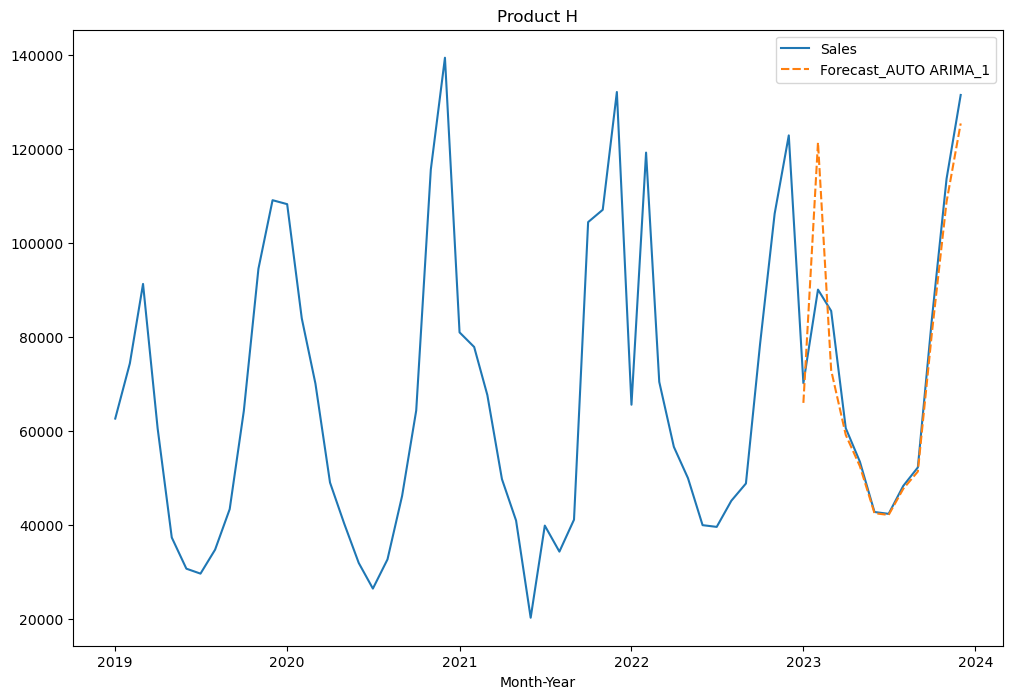

In [22]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_h[['Sales','Forecast_AUTO ARIMA_1']])
plt.title('Product H')

In [23]:
mae_auto_arima_1= mean_absolute_error(test['Sales'],forecast_test_auto_1)
mape_auto_arima_1= mean_absolute_percentage_error(test['Sales'],forecast_test_auto_1)
mse_auto_arima_1=mean_squared_error(test['Sales'],forecast_test_auto_1)
rmse_auto_arima_1= np.sqrt(mean_squared_error(test['Sales'],forecast_test_auto_1))

print(f'MAE - AUTO ARIMA: {mae_auto_arima_1}')
print(f'MAPE - AUTO ARIMA: {mape_auto_arima_1}')
print(f'MSE - AUTO ARIMA: {mse_auto_arima_1}')
print(f'RMSE - AUTO ARIMA: {rmse_auto_arima_1}')

MAE - AUTO ARIMA: 5536.709649943378
MAPE - AUTO ARIMA: 0.0634739111528149
MSE - AUTO ARIMA: 102639467.5694958
RMSE - AUTO ARIMA: 10131.113836567813
